In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# ID dari file spreadsheet
file_id = '1jjuDbfl8hqwurHCDHahxktcpG8M0BRQY'

# Format URL export ke CSV
csv_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Load ke DataFrame
df = pd.read_csv(csv_url)

# Lihat 5 data awal
df.head()


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No


In [ ]:
# Statistik deskriptif
df.describe()


,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,25.222000,2.985092,49.136923,9.809769,79.389785
std,16.961179,0.349956,1.258554,3.459952,14.073021
min,1.000000,1.800000,42.000000,2.900000,53.000000
25%,11.000000,2.900000,49.000000,7.100000,68.900000
50%,20.000000,3.000000,49.000000,9.000000,77.000000
75%,39.000000,3.200000,50.000000,12.000000,92.000000
max,59.000000,4.000000,53.000000,24.500000,111.000000


In [ ]:
# Statistik deskriptif
df.describe()


,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,25.222000,2.985092,49.136923,9.809769,79.389785
std,16.961179,0.349956,1.258554,3.459952,14.073021
min,1.000000,1.800000,42.000000,2.900000,53.000000
25%,11.000000,2.900000,49.000000,7.100000,68.900000
50%,20.000000,3.000000,49.000000,9.000000,77.000000
75%,39.000000,3.200000,50.000000,12.000000,92.000000
max,59.000000,4.000000,53.000000,24.500000,111.000000


In [ ]:
# Total nilai kosong per kolom
print("Jumlah missing value:")
print(df.isnull().sum())

# Atau dalam bentuk persen
print("\nPersentase missing value:")
print(df.isnull().mean() * 100)


Jumlah missing value:
Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

Persentase missing value:
Gender           0.0
Age              0.0
Birth Weight     0.0
Birth Length     0.0
Body Weight      0.0
Body Length      0.0
Breastfeeding    0.0
Stunting         0.0
dtype: float64


In [ ]:
# Cek jumlah baris yang duplikat di seluruh kolom
jumlah_duplikat = df.duplicated(keep=False).sum()
print("Jumlah baris duplikat (seluruh kolom sama persis):", jumlah_duplikat)

# Tampilkan baris duplikat (termasuk yang pertama)
df_duplikat = df[df.duplicated(keep=False)]
print("\nBaris-baris duplikat:")
display(df_duplikat.sort_values(by=df.columns.tolist()).reset_index(drop=True))


Jumlah baris duplikat (seluruh kolom sama persis): 5885

Baris-baris duplikat:


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,2,2.1,49,3.7,53.0,No,Yes
1,female,2,2.1,49,3.7,53.0,No,Yes
2,female,2,2.8,47,4.9,59.0,Yes,No
3,female,2,2.8,47,4.9,59.0,Yes,No
4,female,2,2.8,47,4.9,59.0,Yes,No
...,...,...,...,...,...,...,...,...
5880,male,59,3.5,42,15.5,105.0,Yes,No
5881,male,59,3.5,42,15.5,105.0,Yes,No
5882,male,59,3.5,42,15.5,105.0,Yes,No
5883,male,59,3.8,51,11.7,90.0,Yes,Yes


In [ ]:
# Distribusi target
print("Distribusi kelas 'Stunting':")
print(df['Stunting'].value_counts())
print("\nPersentase:")
print(df['Stunting'].value_counts(normalize=True) * 100)


Distribusi kelas 'Stunting':
Stunting
Yes    3312
No     3188
Name: count, dtype: int64

Persentase:
Stunting
Yes    50.953846
No     49.046154
Name: proportion, dtype: float64


In [ ]:
# Cek kategori unik
print("Gender:", df['Gender'].unique())
print("Breastfeeding:", df['Breastfeeding'].unique())


Gender: ['female' 'male']
Breastfeeding: ['Yes' 'No']


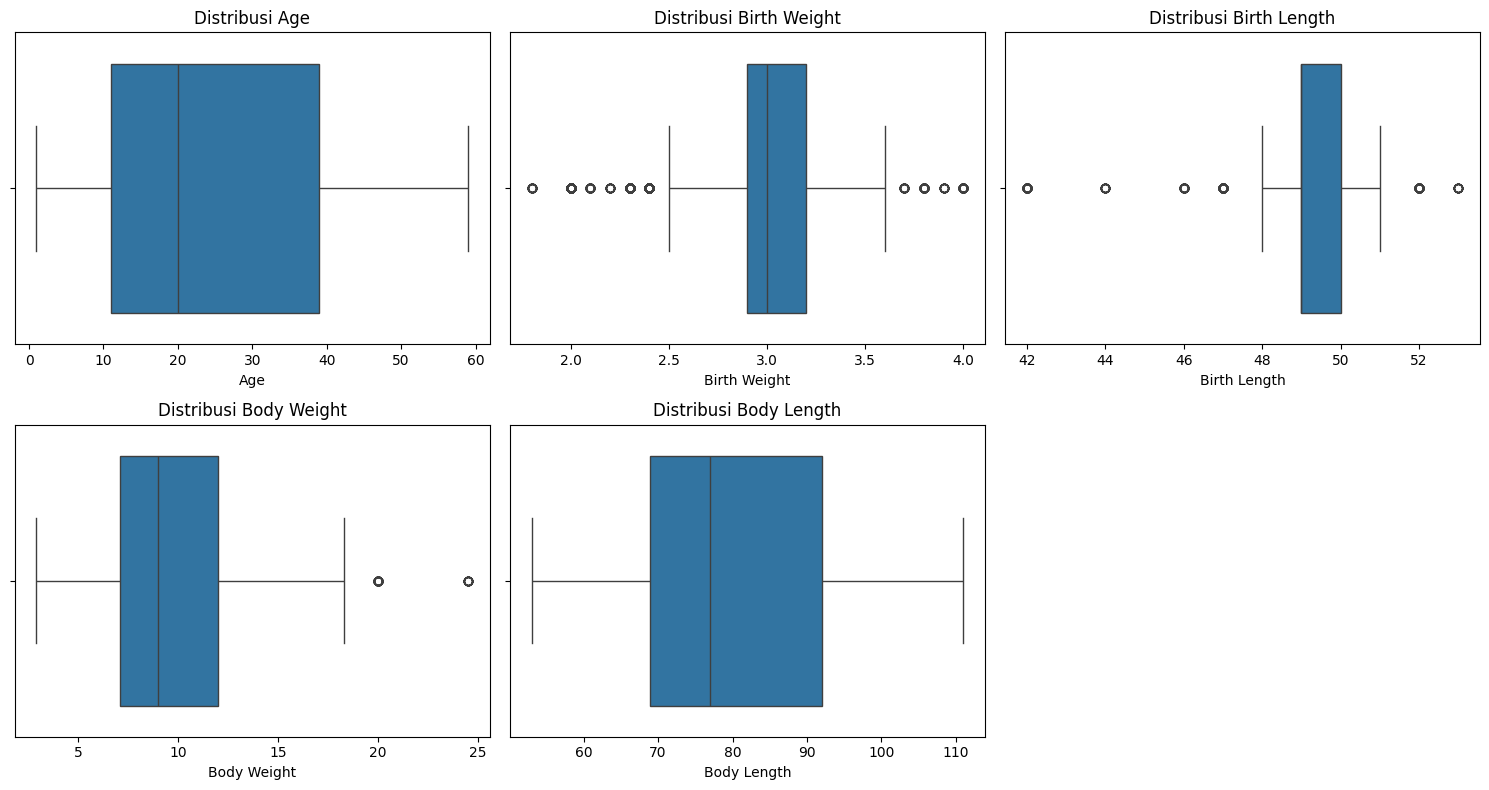

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribusi kolom numerik
numerik_cols = ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerik_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


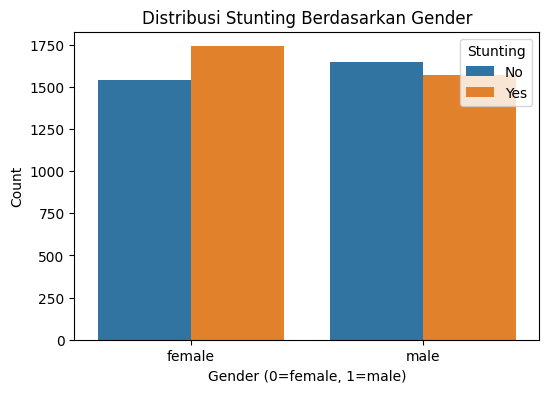

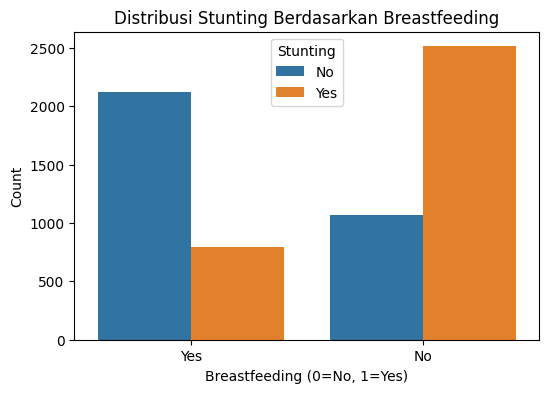

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi Stunting berdasarkan Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Stunting')
plt.title('Distribusi Stunting Berdasarkan Gender')
plt.xlabel('Gender (0=female, 1=male)')
plt.ylabel('Count')
plt.show()

# Visualisasi distribusi Stunting berdasarkan Breastfeeding
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Breastfeeding', hue='Stunting')
plt.title('Distribusi Stunting Berdasarkan Breastfeeding')
plt.xlabel('Breastfeeding (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


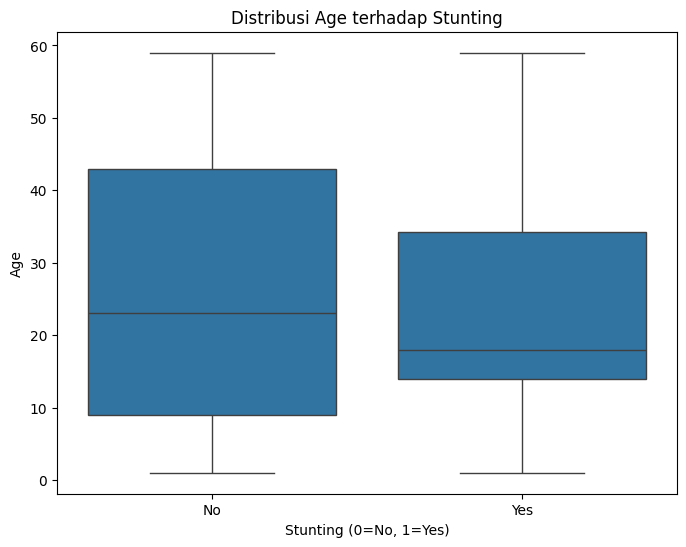

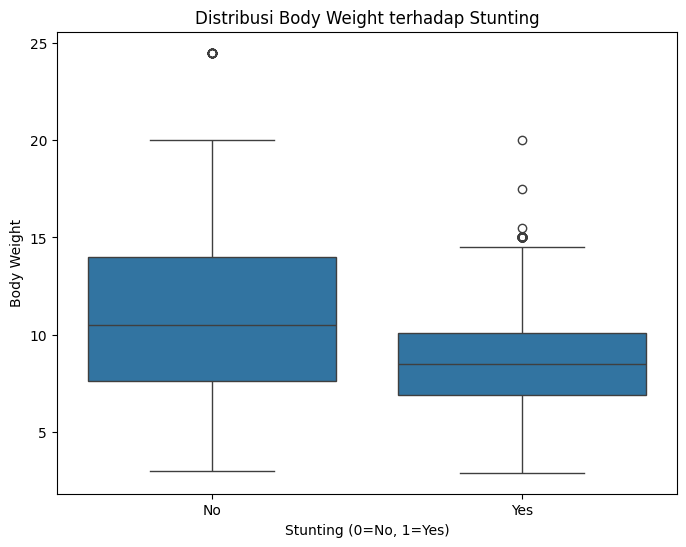

In [ ]:
# Visualisasi distribusi Age terhadap Stunting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Stunting', y='Age')
plt.title('Distribusi Age terhadap Stunting')
plt.xlabel('Stunting (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# Visualisasi distribusi Body Weight terhadap Stunting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Stunting', y='Body Weight')
plt.title('Distribusi Body Weight terhadap Stunting')
plt.xlabel('Stunting (0=No, 1=Yes)')
plt.ylabel('Body Weight')
plt.show()


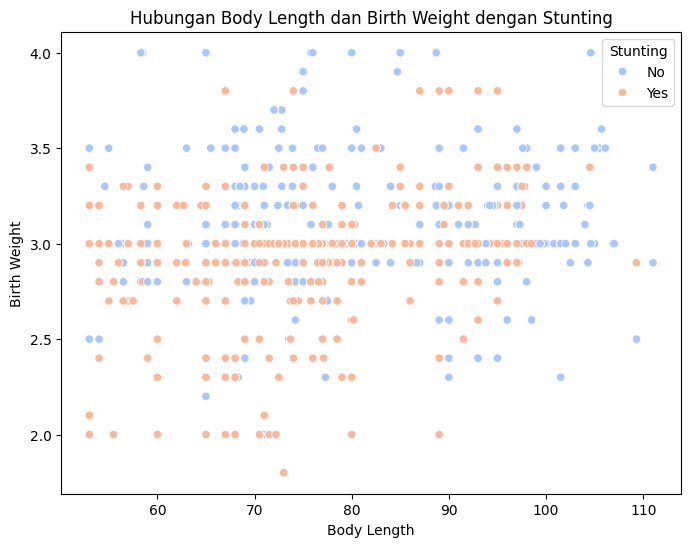

In [ ]:
# Visualisasi scatter plot Body Length vs Stunting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Body Length', y='Birth Weight', hue='Stunting', palette='coolwarm')
plt.title('Hubungan Body Length dan Birth Weight dengan Stunting')
plt.xlabel('Body Length')
plt.ylabel('Birth Weight')
plt.legend(title='Stunting', loc='upper right')
plt.show()


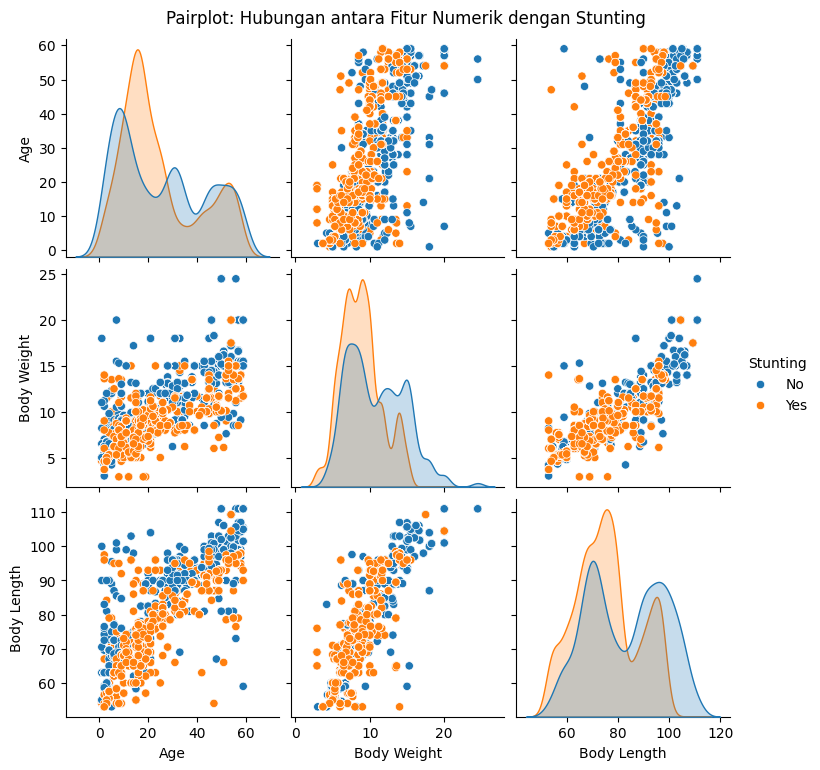

In [ ]:
# Visualisasi pairplot untuk fitur numerik
sns.pairplot(df, hue='Stunting', vars=['Age', 'Body Weight', 'Body Length'])
plt.suptitle('Pairplot: Hubungan antara Fitur Numerik dengan Stunting', y=1.02)
plt.show()


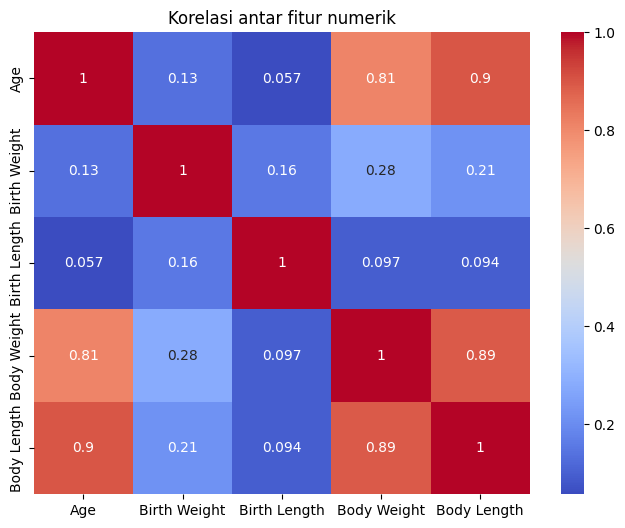

In [ ]:
# Korelasi numerik
correlation = df[numerik_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur numerik')
plt.show()


In [ ]:
# Salin dataframe agar tidak merusak aslinya
df_encoded = df.copy()

# Mapping manual (karena biner)
df_encoded['Gender'] = df_encoded['Gender'].map({'male': 1, 'female': 0})
df_encoded['Breastfeeding'] = df_encoded['Breastfeeding'].map({'Yes': 1, 'No': 0})
df_encoded['Stunting'] = df_encoded['Stunting'].map({'Yes': 1, 'No': 0})

# Cek hasil
df_encoded.head()


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,56,2.9,50,11.0,90.0,1,0
1,0,20,3.3,49,11.1,80.5,0,0
2,1,4,2.8,48,6.5,63.0,0,0
3,0,14,2.0,49,7.0,71.0,1,0
4,1,32,3.2,49,11.0,88.7,1,0


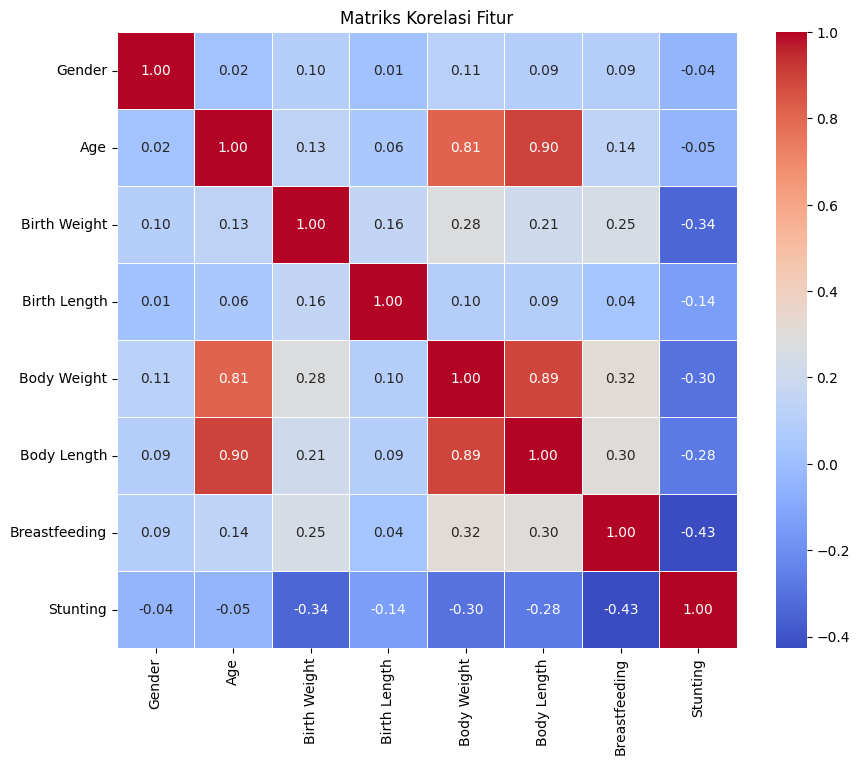

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur
corr_matrix = df_encoded.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_encoded.drop('Stunting', axis=1)  # Fitur
y = df_encoded['Stunting']  # Target

# Split data menjadi train + val (80%) dan test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split data train + val menjadi train (60%) dan validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Cek dimensi setelah split
print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


Train: (3900, 7) Validation: (1300, 7) Test: (1300, 7)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model = LogisticRegression(random_state=42)

# Inisialisasi RFE (misalnya ambil 5 fitur terpenting)
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE dengan data train
rfe.fit(X_train, y_train)

# Fitur yang dipilih oleh RFE
selected_features = X_train.columns[rfe.support_]
print("Fitur terpilih:", selected_features)


Fitur terpilih: Index(['Gender', 'Age', 'Birth Weight', 'Body Length', 'Breastfeeding'], dtype='object')


In [ ]:
import joblib

# Simpan feature selector
joblib.dump(rfe, 'feature_selector.pkl')

['feature_selector.pkl']

In [ ]:
# Pilih fitur terpilih
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Cek dimensi data setelah seleksi fitur
print("Train selected features:", X_train_selected.shape)
print("Validation selected features:", X_val_selected.shape)
print("Test selected features:", X_test_selected.shape)


Train selected features: (3900, 5)
Validation selected features: (1300, 5)
Test selected features: (1300, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform data train, lalu hanya transform untuk validation dan test
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Cek hasil normalisasi
print("Train scaled:", X_train_scaled[:5])


Train scaled: [[ 1.02440016  1.17240228  0.0436666   0.54765575 -0.90922928]
 [ 1.02440016 -0.12954193  0.0436666  -0.19472481 -0.90922928]
 [ 1.02440016 -0.42543834  0.0436666  -0.23755446 -0.90922928]
 [ 1.02440016 -0.54379691  0.0436666  -0.63015956 -0.90922928]
 [ 1.02440016 -0.60297619 -0.80359579 -0.38031995  1.09983259]]


In [ ]:
# Simpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
import tensorflow as tf

# Konversi data ke bentuk tensor
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)

y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Bangun model Sequential
model = Sequential()

# Input layer dan hidden layer pertama (64 unit)
model.add(Dense(64, input_dim=X_train_tensor.shape[1], activation='relu'))

# Tambahkan Dropout untuk regularisasi
model.add(Dropout(0.5))

# Hidden layer kedua (32 unit)
model.add(Dense(32, activation='relu'))

# Output layer (1 unit untuk klasifikasi biner)
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model dengan loss binary_crossentropy, optimizer Adam, dan metrics akurasi
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ringkasan model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6914 - loss: 0.6183 - val_accuracy: 0.7915 - val_loss: 0.4854
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.5180 - val_accuracy: 0.8154 - val_loss: 0.4442
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4749 - val_accuracy: 0.8431 - val_loss: 0.4112
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8014 - loss: 0.4621 - val_accuracy: 0.8477 - val_loss: 0.3836
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8257 - loss: 0.4233 - val_accuracy: 0.8477 - val_loss: 0.3626
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8362 - loss: 0.3984 - val_accuracy: 0.8623 - val_loss: 0.3501
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8426 - loss: 0.3845 - val_accuracy: 0.8608 - val_loss: 0.3391
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8490 - loss: 0.3733 - val_accuracy: 0

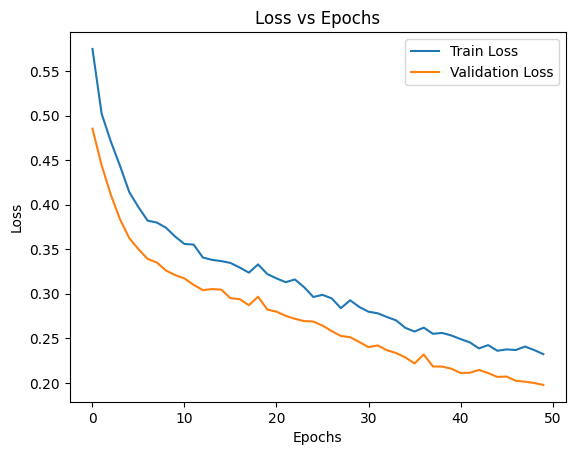

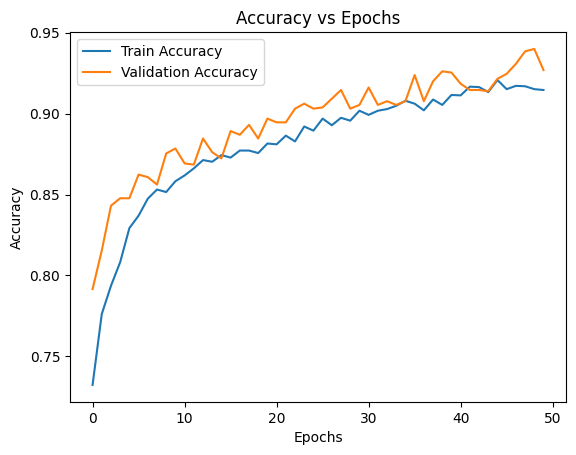

In [ ]:
# Latih model
history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32, validation_data=(X_val_tensor, y_val_tensor))

# Visualisasi training vs validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualisasi akurasi training vs validation
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9264 - loss: 0.2023
Test Loss: 0.1775
Test Accuracy: 0.9362


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


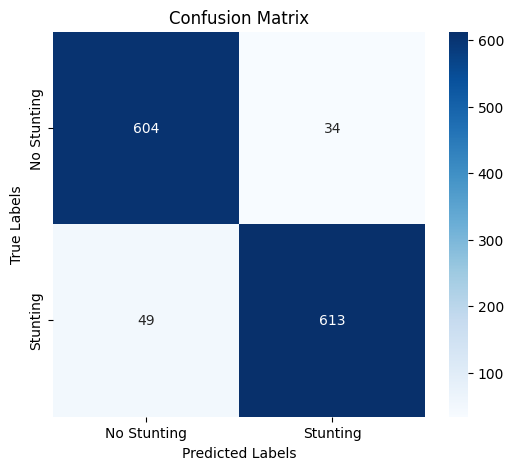

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi pada data test
y_pred = model.predict(X_test_tensor)

# Konversi probabilitas ke label (0 atau 1)
y_pred_labels = (y_pred > 0.5).astype(int)

# Hitung confusion matrix
cm = confusion_matrix(y_test_tensor, y_pred_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stunting', 'Stunting'], yticklabels=['No Stunting', 'Stunting'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test_tensor, y_pred_labels, target_names=['No Stunting', 'Stunting']))


Classification Report:
              precision    recall  f1-score   support

 No Stunting       0.92      0.95      0.94       638
    Stunting       0.95      0.93      0.94       662

    accuracy                           0.94      1300
   macro avg       0.94      0.94      0.94      1300
weighted avg       0.94      0.94      0.94      1300



In [ ]:
# Prediksi pada data test
y_pred = model.predict(X_test_tensor)

# Konversi probabilitas ke label (0 atau 1)
y_pred_labels = (y_pred > 0.5).astype(int)

# Tampilkan beberapa hasil prediksi
print("Prediksi:", y_pred_labels[:10].flatten())
print("Aktual:", y_test_tensor[:10].numpy())


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediksi: [1 1 1 1 1 0 1 0 1 1]
Aktual: [1. 1. 1. 1. 1. 0. 1. 0. 1. 1.]


In [ ]:
# Simpan model ke dalam format HDF5 (.h5)
model.save('stunting_model.h5')


In [ ]:
# Gunakan TFLiteConverter untuk mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Opsional: Mengoptimalkan model untuk perangkat dengan sumber daya terbatas
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert model ke format TFLite
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('stunting_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpiw0_v08f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135494186843216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135494186843600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135494186842832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135494186843408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135495804732432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135495804733200: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Simpan arsitektur model ke dalam file JSON
model_json = model.to_json()
with open('stunting_model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Simpan bobot model ke dalam format HDF5
model.save_weights('stunting_model.weights.h5')


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Muat model yang sudah disimpan (gunakan path file yang sesuai dengan model Anda)
model = tf.keras.models.load_model('stunting_model.h5')

# Ambil data test (asumsi kita sudah split data sebelumnya)
X_test = df_encoded[['Gender', 'Age', 'Birth Weight', 'Body Length', 'Breastfeeding']].values
y_test = df_encoded['Stunting'].values

# Pilih salah satu data test (misalnya data ke-10)
index = 15
sample_input = X_test[index]
actual_label = y_test[index]

# Melakukan prediksi
prediction = model.predict(sample_input.reshape(1, -1))

# Menampilkan hasil prediksi dan nilai aktual
predicted_label = 1 if prediction[0][0] > 0.5 else 0  # Mengubah output menjadi biner

# Tampilkan hasil
print(f"Data Test (Index: {index}):")
print(f"Gender: {sample_input[0]}, Age: {sample_input[1]}, Birth Weight: {sample_input[2]}, "
      f"Body Length: {sample_input[3]}, Breastfeeding: {sample_input[4]}")

print("\nHasil Prediksi:")
print("Prediksi Stunting (1: Yes, 0: No):", predicted_label)

print("\nNilai Aktual:")
print("Aktual Stunting (1: Yes, 0: No):", actual_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Data Test (Index: 15):
Gender: 0.0, Age: 12.0, Birth Weight: 3.6, Body Length: 70.5, Breastfeeding: 1.0

Hasil Prediksi:
Prediksi Stunting (1: Yes, 0: No): 0

Nilai Aktual:
Aktual Stunting (1: Yes, 0: No): 0


In [ ]:
import pandas as pd

# Konversi dari angka kembali ke label asli
gender_map_reverse = {0: 'female', 1: 'male'}
breastfeeding_map_reverse = {0: 'No', 1: 'Yes'}

# Konversi X_test dan X_val ke dataframe
X_test_df = pd.DataFrame(X_test, columns=['Gender', 'Age', 'Birth Weight', 'Body Length', 'Breastfeeding'])
X_val_df = pd.DataFrame(X_val, columns=['Gender', 'Age', 'Birth Weight', 'Body Length', 'Breastfeeding'])

# Ubah kolom kategori ke bentuk asli
X_test_df['Gender'] = X_test_df['Gender'].map(gender_map_reverse)
X_test_df['Breastfeeding'] = X_test_df['Breastfeeding'].map(breastfeeding_map_reverse)

X_val_df['Gender'] = X_val_df['Gender'].map(gender_map_reverse)
X_val_df['Breastfeeding'] = X_val_df['Breastfeeding'].map(breastfeeding_map_reverse)

# Konversi y_test dan y_val ke dataframe
y_test_df = pd.DataFrame(y_test, columns=['Stunting'])
y_val_df = pd.DataFrame(y_val, columns=['Stunting'])

# Gabungkan fitur dan label
test_data = pd.concat([X_test_df, y_test_df], axis=1)
val_data = pd.concat([X_val_df, y_val_df], axis=1)

# Simpan ke file CSV
test_data.to_csv('/content/test_data.csv', index=False)
val_data.to_csv('/content/val_data.csv', index=False)


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Misalnya, kita punya objek scaler dan label_encoder
scaler = StandardScaler()
label_encoder = LabelEncoder()

# Latih scaler dan label_encoder menggunakan data (contoh)
# scaler.fit(X_train)  # X_train adalah data fitur
# label_encoder.fit(y_train)  # y_train adalah label target

# Simpan scaler ke dalam file .pkl
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Simpan label_encoder ke dalam file .pkl
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Untuk memastikan file tersimpan, kita bisa mengecek
import shutil
shutil.move('scaler.pkl', '/content/scaler.pkl')
shutil.move('label_encoder.pkl', '/content/label_encoder.pkl')

print("File scaler.pkl dan label_encoder.pkl berhasil disimpan!")


File scaler.pkl dan label_encoder.pkl berhasil disimpan!


In [ ]:
# Install library untuk cek semua package (jika belum ada)
!pip install pipreqs

# Import library yang diperlukan
import pkg_resources

# Ambil daftar semua library dan versinya
installed_packages = pkg_resources.working_set
package_list = sorted(["{}=={}".format(i.key, i.version) for i in installed_packages])

# Simpan ke file txt
with open('library_versions.txt', 'w') as f:
    for package in package_list:
        f.write(package + '\n')

# Print konfirmasi
print("Daftar library dan versinya sudah disimpan ke library_versions.txt")

# (Opsional) Tampilkan beberapa isinya
with open('library_versions.txt', 'r') as f:
    for _ in range(10):  # tampilkan 10 baris pertama
        print(f.readline().strip())


Daftar library dan versinya sudah disimpan ke library_versions.txt
absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install pipreqs (hanya kalau mau, tapi tidak dipakai di metode manual ini)
!pip install pipreqs

# Import library yang dibutuhkan
import pkg_resources

# Daftar nama package yang kamu gunakan
packages_used = [
    'pickle',
    'sklearn',
    'pandas',
    'tensorflow',
    'numpy',
    'seaborn',
    'matplotlib',
    'joblib'
]

# Ambil semua package yang sudah terinstall
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

# Simpan hanya yang kamu gunakan
filtered_packages = {}

for package in packages_used:
    # Karena ada sedikit perbedaan nama package vs modul, kita handle khusus
    if package == 'sklearn':
        real_package = 'scikit-learn'
    else:
        real_package = package

    version = installed_packages.get(real_package)
    if version:
        filtered_packages[real_package] = version
    else:
        print(f"Peringatan: {real_package} tidak ditemukan!")

# Simpan ke file txt di Drive
save_path = '/content/drive/MyDrive/Capstone_DBS/library_versions.txt'

with open(save_path, 'w') as f:
    for pkg, ver in filtered_packages.items():
        f.write(f"{pkg}=={ver}\n")

print(f"Library dan versinya berhasil disimpan di {save_path}")

# (Opsional) tampilkan isi file
with open(save_path, 'r') as f:
    print(f.read())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Peringatan: pickle tidak ditemukan!
Library dan versinya berhasil disimpan di /content/drive/MyDrive/Capstone_DBS/library_versions.txt
scikit-learn==1.6.1
pandas==2.2.2
tensorflow==2.18.0
numpy==2.2.6
seaborn==0.13.2
matplotlib==3.10.0
joblib==1.5.0



In [ ]:
import shutil
import os

# Mount Google Drive dulu (kalau belum)
from google.colab import drive
drive.mount('/content/drive')

# Path sumber (semua isi /content) dan tujuan
source_folder = '/content'
destination_folder = '/content/drive/MyDrive/Capstone_DBS'

# Pastikan folder tujuan ada, kalau tidak buat
os.makedirs(destination_folder, exist_ok=True)

# Pindahkan semua file (kecuali folder 'drive' itu sendiri agar tidak error)
for item in os.listdir(source_folder):
    if item == 'drive':
        continue  # Skip folder drive
    s = os.path.join(source_folder, item)
    d = os.path.join(destination_folder, item)

    if os.path.isdir(s):
        # Jika item adalah folder, salin seluruh folder
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        # Jika file biasa, salin file
        shutil.copy2(s, d)

print(f"Semua file dari /content/ berhasil disalin ke {destination_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Semua file dari /content/ berhasil disalin ke /content/drive/MyDrive/Capstone_DBS
